In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt 
import pandas
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn import preprocessing
import seaborn as sns

dfwm=pd.read_csv(r'C:\luyan\paper_code\data\xgb_result_wm.csv')
dffs=pd.read_csv(r'C:\luyan\paper_code\data\xgb_result_fs.csv')

In [2]:
dfwm.describe()

,recall,pre,acc,roc,f1,tnr
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.695101,0.824180,0.701592,0.689603,0.733165,0.684105
std,0.190598,0.154758,0.114642,0.092809,0.159121,0.203675
min,0.000000,0.000000,0.338369,0.359459,0.000000,0.230769
25%,0.597971,0.770392,0.645547,0.629738,0.663922,0.511988
50%,0.736707,0.875826,0.723940,0.685011,0.780041,0.744542
75%,0.840948,0.925613,0.789973,0.755241,0.850667,0.848828
max,0.983333,1.000000,0.893499,0.896510,0.935035,1.000000


In [3]:
dffs.describe()

,recall,pre,acc,roc,f1,tnr
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.771617,0.573424,0.714253,0.696652,0.639939,0.621687
std,0.177813,0.194121,0.102627,0.083743,0.170552,0.198468
min,0.041667,0.071429,0.385809,0.489089,0.052632,0.140845
25%,0.671212,0.435649,0.653025,0.651497,0.555565,0.464469
50%,0.802531,0.589948,0.728709,0.690728,0.673466,0.665797
75%,0.897721,0.721746,0.788716,0.758010,0.740928,0.778142
max,1.000000,0.964602,0.905512,0.907143,0.947826,0.940092


<ipython-input-12-cd4cc594a3f4>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
<ipython-input-12-cd4cc594a3f4>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
<ipython-input-12-cd4cc594a3f4>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
<ipython-input-12-cd4cc594a3f4>:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


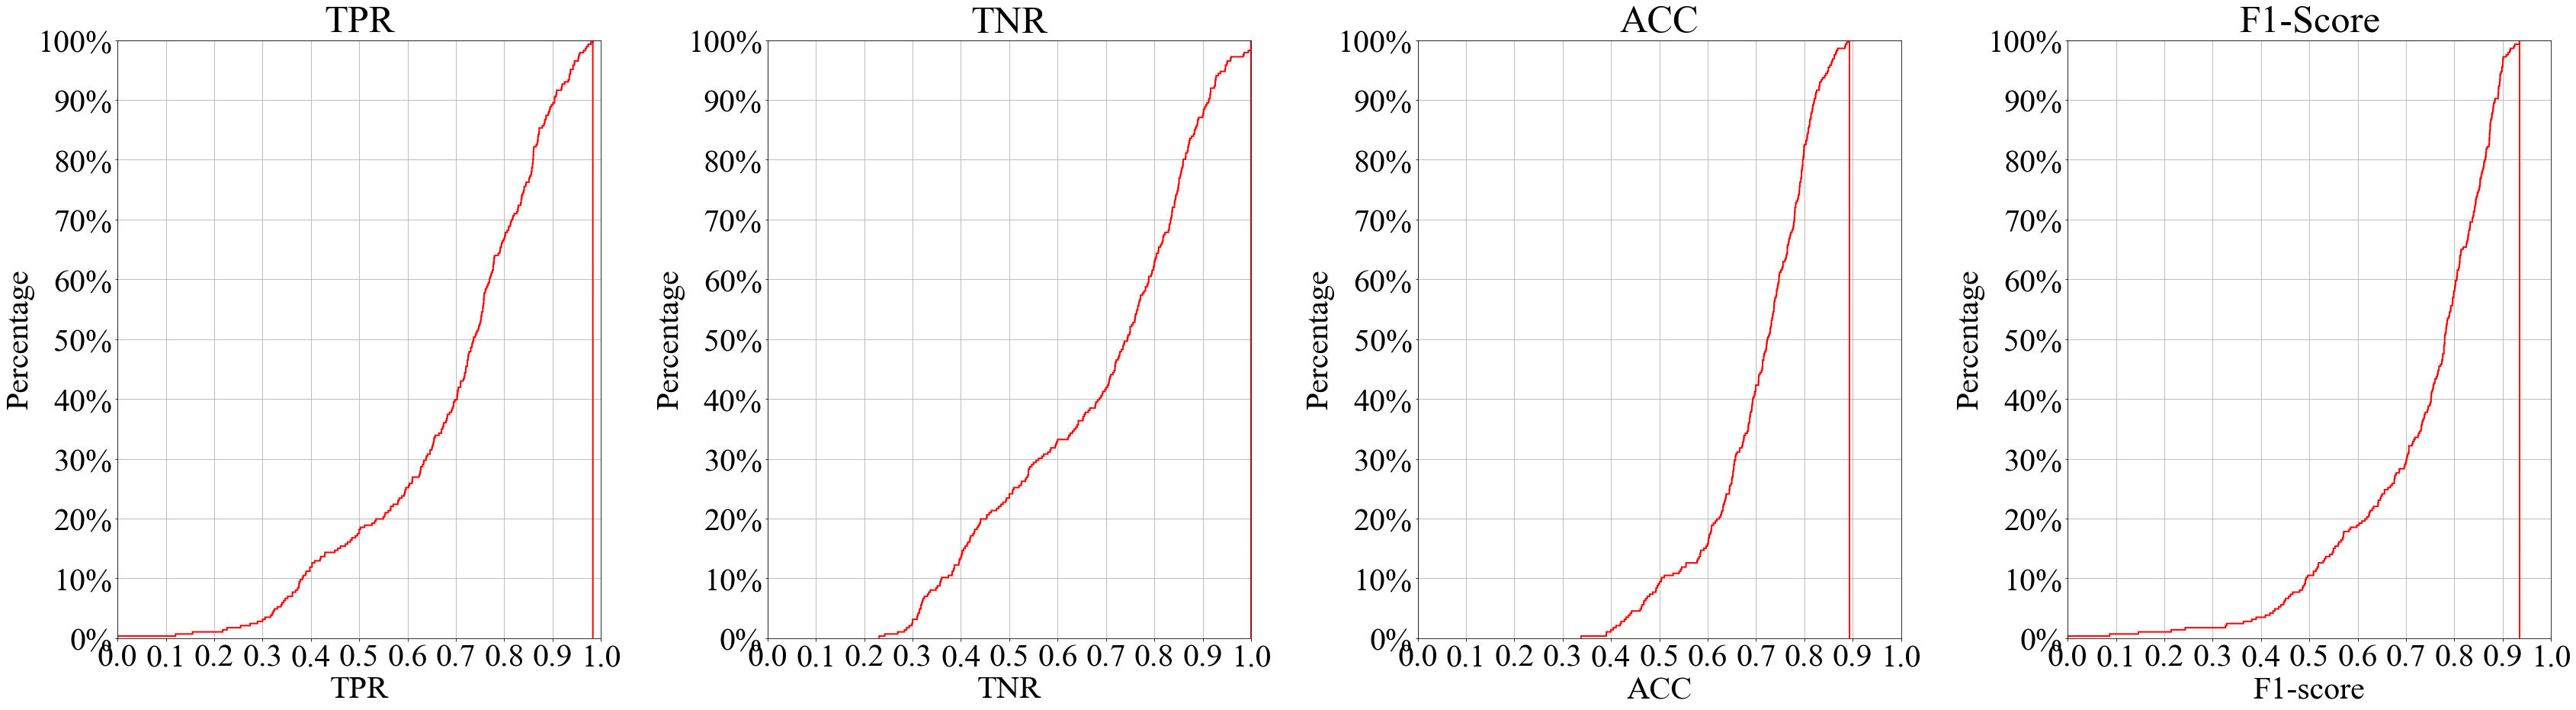

In [12]:
plt.rc("font",family="Times New Roman",size=42)
fig,ax=plt.subplots(ncols=4,figsize=(48,14))


ax[0].hist(dfwm['recall'],bins=10000,color='r',density=True,cumulative=True, histtype='step',linewidth=2)
ax[0].grid(True)
ax[0].xaxis.set_major_locator(MultipleLocator(0.1))
ax[0].yaxis.set_major_locator(MultipleLocator(0.1))



ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[0].set_xlabel('TPR')
ax[0].set_ylabel('Percentage')

ax[0].set_title('TPR')
vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax[1].hist(dfwm['tnr'],bins=10000,color='r',density=True,cumulative=True, histtype='step',linewidth=2)
ax[1].grid(True)
ax[1].xaxis.set_major_locator(MultipleLocator(0.1))
ax[1].yaxis.set_major_locator(MultipleLocator(0.1))



ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
ax[1].set_xlabel('TNR')
ax[1].set_ylabel('Percentage')

ax[1].set_title('TNR')
vals = ax[1].get_yticks()
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax[2].hist(dfwm['acc'],bins=10000,color='r',density=True,cumulative=True, histtype='step',linewidth=2)
ax[2].grid(True)
ax[2].xaxis.set_major_locator(MultipleLocator(0.1))
ax[2].yaxis.set_major_locator(MultipleLocator(0.1))



ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('ACC')
ax[2].set_ylabel('Percentage')

ax[2].set_title('ACC')
vals = ax[2].get_yticks()
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


ax[3].hist(dfwm['f1'],bins=10000,color='r',density=True,cumulative=True, histtype='step',linewidth=2)
ax[3].grid(True)
ax[3].xaxis.set_major_locator(MultipleLocator(0.1))
ax[3].yaxis.set_major_locator(MultipleLocator(0.1))



ax[3].set_xlim(0,1)
ax[3].set_ylim(0,1)
ax[3].set_xlabel('F1-score')
ax[3].set_ylabel('Percentage')

ax[3].set_title('F1-Score')
vals = ax[3].get_yticks()
ax[3].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.savefig(r'C:\luyan\fig\fig11a.jpg',dpi=600)

<ipython-input-13-410165875381>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
<ipython-input-13-410165875381>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
<ipython-input-13-410165875381>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
<ipython-input-13-410165875381>:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


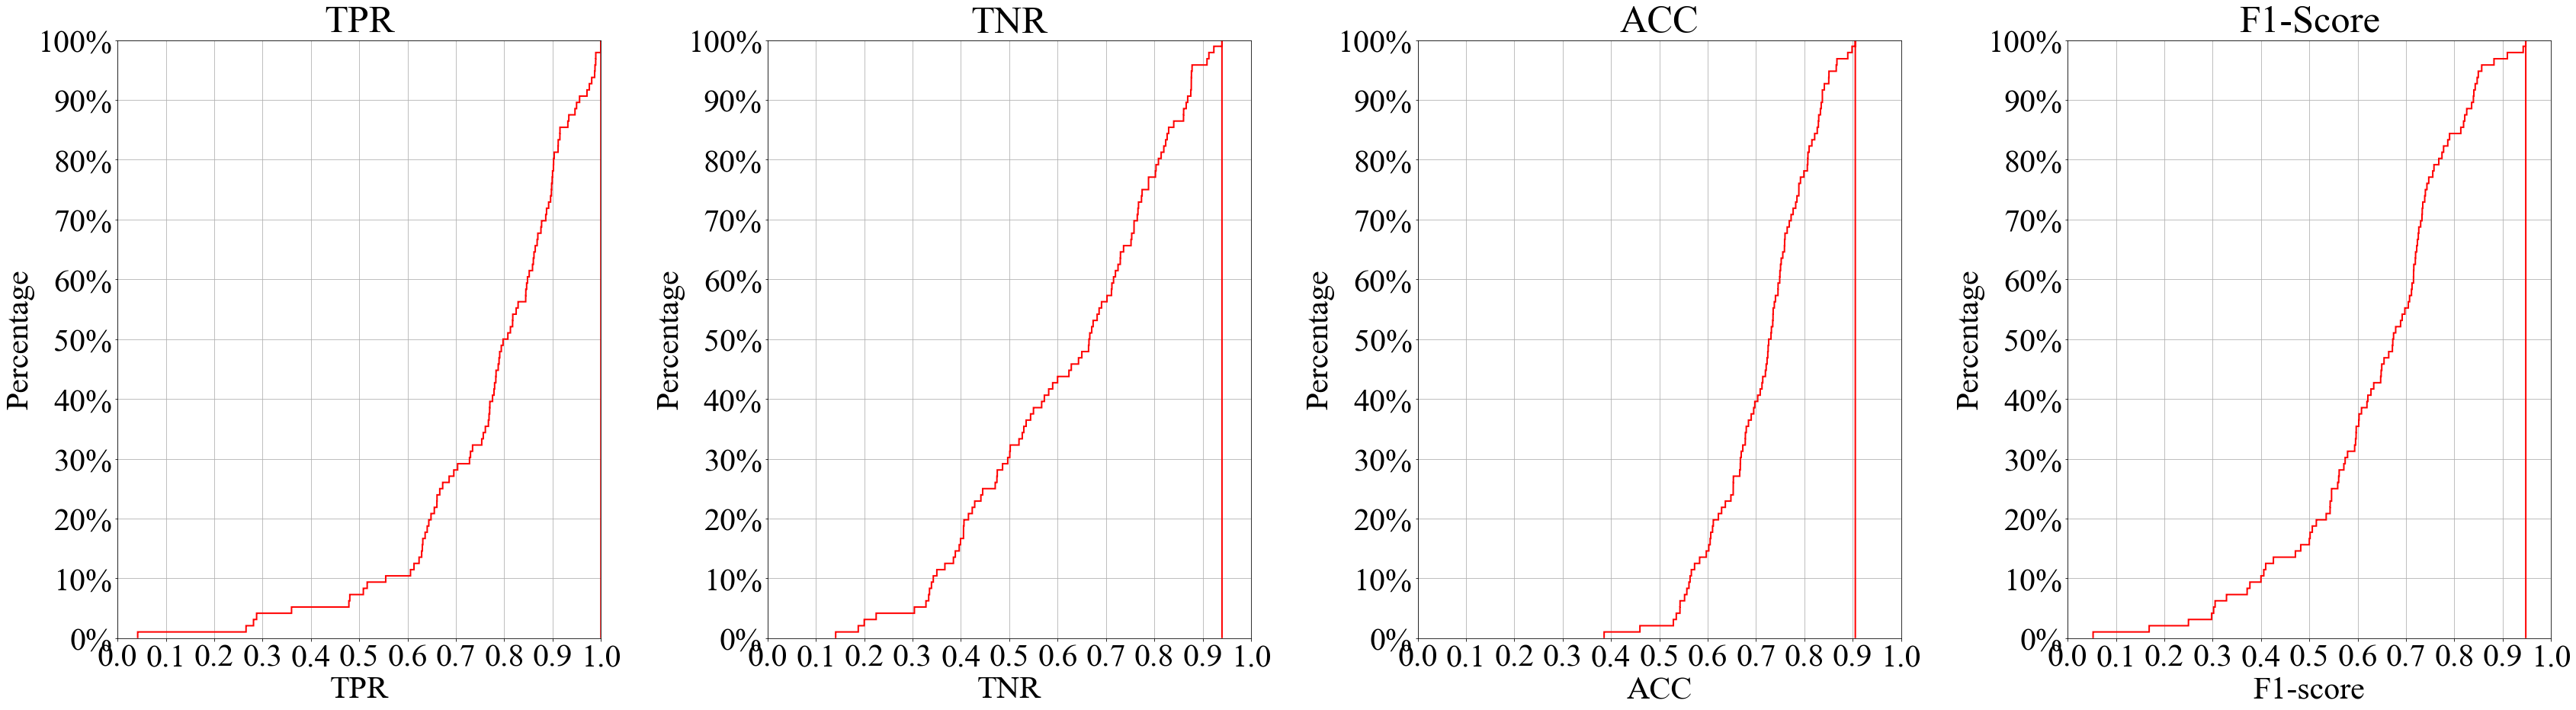

In [13]:
plt.rc("font",family="Times New Roman",size=42)
fig,ax=plt.subplots(ncols=4,figsize=(48,14))


ax[0].hist(dffs['recall'],bins=10000,color='r',density=True,cumulative=True, histtype='step',linewidth=2)
ax[0].grid(True)
ax[0].xaxis.set_major_locator(MultipleLocator(0.1))
ax[0].yaxis.set_major_locator(MultipleLocator(0.1))



ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[0].set_xlabel('TPR')
ax[0].set_ylabel('Percentage')

ax[0].set_title('TPR')
vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax[1].hist(dffs['tnr'],bins=10000,color='r',density=True,cumulative=True, histtype='step',linewidth=2)
ax[1].grid(True)
ax[1].xaxis.set_major_locator(MultipleLocator(0.1))
ax[1].yaxis.set_major_locator(MultipleLocator(0.1))



ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
ax[1].set_xlabel('TNR')
ax[1].set_ylabel('Percentage')

ax[1].set_title('TNR')
vals = ax[1].get_yticks()
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax[2].hist(dffs['acc'],bins=10000,color='r',density=True,cumulative=True, histtype='step',linewidth=2)
ax[2].grid(True)
ax[2].xaxis.set_major_locator(MultipleLocator(0.1))
ax[2].yaxis.set_major_locator(MultipleLocator(0.1))



ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('ACC')
ax[2].set_ylabel('Percentage')

ax[2].set_title('ACC')
vals = ax[2].get_yticks()
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


ax[3].hist(dffs['f1'],bins=10000,color='r',density=True,cumulative=True, histtype='step',linewidth=2)
ax[3].grid(True)
ax[3].xaxis.set_major_locator(MultipleLocator(0.1))
ax[3].yaxis.set_major_locator(MultipleLocator(0.1))



ax[3].set_xlim(0,1)
ax[3].set_ylim(0,1)
ax[3].set_xlabel('F1-score')
ax[3].set_ylabel('Percentage')

ax[3].set_title('F1-Score')
vals = ax[3].get_yticks()
ax[3].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.tight_layout()
plt.savefig(r'C:\luyan\fig\fig11b.jpg',dpi=600)